# Learning Algorithm
For solving the Continuous version of the Reacher environment, I decided to use the DDPG algorithm. As part of the DDPG implementation, I made use of:

 1. Experience Replay ( Replay Buffer)
 2. Actor Critic models
 3. Soft update using local and target networks and controlling using hyperparameter TAU

# Hyperparameters
I experiaemented with following Hyperparameters in various runs and solved the environment using the values shown below:

 1. BATCH_SIZE = 1024 ( Size of the batch used for sampling)
 2. BUFFER_SIZE = 1e5 ( Replay buffer size aka memory size )
 3. TAU  = 0.1 ( To control how much the target network should be updated using the local network)
 4. GAMMA = 0.99 ( discount factor )
 5. ACTOR_LR = 1e-3 ( Learning rate used for actor model )
 6. CRITIC_LR = 1e-3 ( Learning rate used for critic model )
 7. UPDATE_EVERY = 100 (How frequent do we want to learn i.e at every UPDATE_EVERY steps)
 8. LEARN_TIMES = 1 ( how many times should we perform learning during every UPDATE_EVERY steps)

# Model Architecture
My solution uses Actor Critic models to implement DDPG. As with any DDPG algorithm, the local actor critic models have their respective copy i.e target models. 

1. Actor Model - My actor model is made up of 3 fully connected layers ( 33x64, 64x256, 256 x action_size ). The activation function in the final output layer is tanh, as we need our action values to be between -1 and 1. The other two layers use relu activation functions. 

2. Critic model - My critic model is again made up of 3 fully connected layers ( 33x64, 64x256, 256x1). The last layer does not have any activation function. The other 2 layers use relu activation function. 

# Implementation

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Wandb version 0.10.10 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
Episode:0, Total score (averaged over agents) this episode: 0.5869999868795276, Av

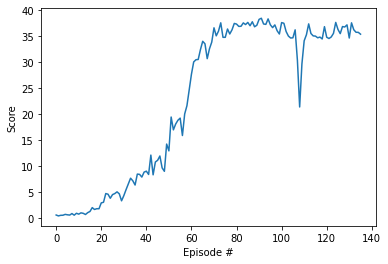

In [1]:
from solution import ContinuousControlSolution
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

try:
    sol = ContinuousControlSolution(env)
    scores = sol.train(num_episodes=150)
    if scores:
        # plot the scores
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scores)), scores)
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()
finally:
    env.close()


# Graphs
Here are few more graphs showing the learning scores per episode and average score for 100 episodes

![Learning graph](./images/learning-graph.jpg)



# Try the trained model

In [1]:
from solution import ContinuousControlSolution
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

try:
    sol = ContinuousControlSolution(env,enable_wandb=False)
    sol.watch_trained('checkpoint')
finally:
    env.close()


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.

# Video of the trained model
%%HTML
<div align="middle">
      <video width="80%" controls>
            <source src="./video.mp4" type="video/mp4">
      </video>
</div>

# Ideas for future Work
During this project, I was experience the unstable nature of DDPG. Based on my reading on DDPG, it seems like the algorithm is known to its unstable nature. Next I will like to try out algorithms like TRPO to solve this environment. 